In [1]:
import pandas as pd
import numpy as np
from agent import Agent
from trading_env import TradingEnv
from trading_env_plotter import TradingEnvPlotter

Episode 1/1 - Total Reward: -7419.55


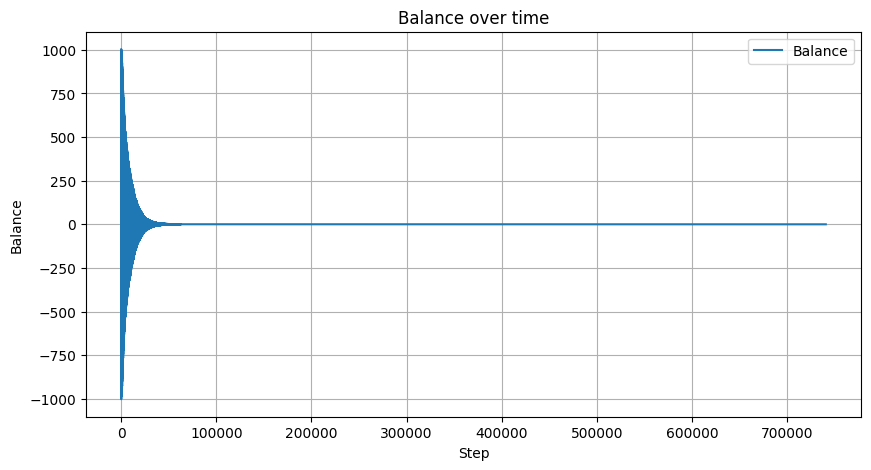

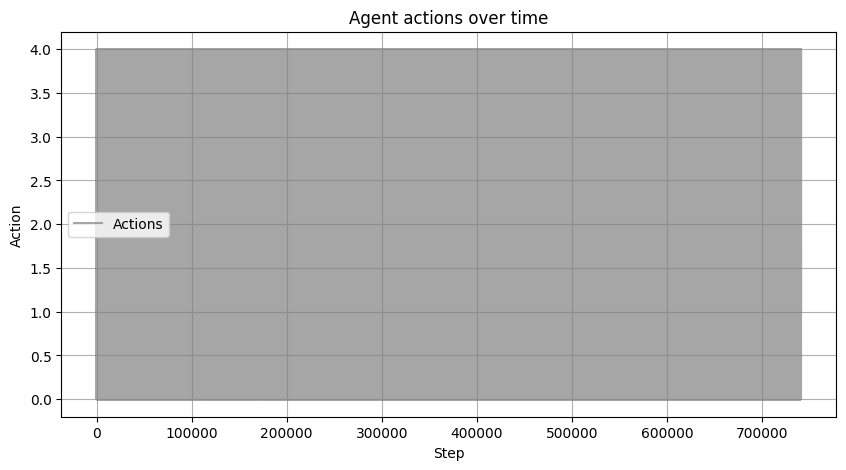

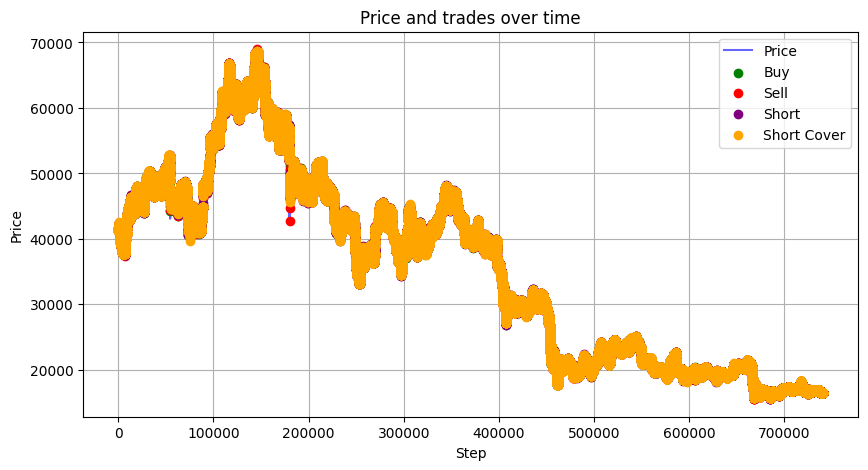

In [2]:
# Hyperparameters
EPISODES = 1#300
EPS_START = 1.0
EPS_DECAY = 0.995
EPS_MIN = 0.01
LEARNING_RATE = 0.001
GAMMA = 0.99
INPUT_DIM = 1

def main():
    # ヒストリカルデータの読み込み
    df = pd.read_csv('../csv/BTCUSDT_1m_20210801_20221231.csv')
    prices = df['close'].values

    # 環境、エージェント、プロッターの初期化
    env = TradingEnv(prices)
    agent = Agent(INPUT_DIM, action_dim=5, learning_rate=LEARNING_RATE, gamma=GAMMA)
    plotter = TradingEnvPlotter(env)

    epsilon = EPS_START
    for episode in range(1, EPISODES + 1):
        state = env.reset()
        total_reward = 0

        while True:
            action = agent.select_action(state, epsilon)
            next_state, reward, done = env.step(action)

            # For visualization later
            plotter.record_step(action)

            agent.train(state, action, reward, next_state, done)

            state = next_state
            total_reward += reward
            print(reward)

            if done:
                break

        epsilon = max(epsilon * EPS_DECAY, EPS_MIN)
        print(f"Episode {episode}/{EPISODES} - Total Reward: {total_reward:.2f}")

    # Visualization after training
    plotter.plot_balance()
    plotter.plot_actions()
    plotter.plot_prices_and_trades()


if __name__ == "__main__":
    main()
